In [1]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix, classification_report, matthews_corrcoef
from sklearn.preprocessing import PolynomialFeatures, StandardScaler 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import time

## 🔍 KNN Classification with Polynomial Features

This function performs classification using **K-Nearest Neighbors (KNN)** on four selected features from the diamonds dataset:

- `table`
- `xlength`
- `ywidth`
- `zdepth`

### Key Steps:
- **Polynomial Feature Expansion**: The original input features are expanded to degree 3 to capture non-linear interactions.
- **Pipeline**:
  - `StandardScaler`: Scales features for optimal KNN performance.
  - `KNeighborsClassifier(n_neighbors=3)`: Classifies each sample based on its 3 nearest neighbors.

### Outputs:
- **R² Score** – accuracy of predictions on the current data
- **Matthews Correlation Coefficient (MCC)** – useful for imbalanced classification
- **Confusion Matrix**
- **Classification Report** (precision, recall, F1-score)
- **Execution Time**

This serves as a baseline KNN classifier before dimensionality reduction techniques (like PCA or t-SNE) are introduced.


In [2]:
def knn(data, x_label, y_label):
    start_time = time.time()
    
    x1 = data[x_label[0]].to_numpy().reshape(-1, 1)
    x2 = data[x_label[1]].to_numpy().reshape(-1, 1)
    x3 = data[x_label[2]].to_numpy().reshape(-1, 1)
    x4 = data[x_label[3]].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    x = np.concatenate((x1, x2, x3, x4), axis=1)
    
    x = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)

    KNN = Pipeline ([
        ("scaler", StandardScaler()),
        ("KNN", KNeighborsClassifier(n_neighbors=3))
    ])
        
    KNN = KNN.fit(x, y)

    y_pred = KNN.predict(x)

    print("coefficient of determinantion (R^2): ", KNN["KNN"].score(x, y))
    print("matthews_corrcoef: ", matthews_corrcoef(y, y_pred))
    print()
    print("Confusion matrix: ")
    print(confusion_matrix(y, y_pred))
    print()
    print("Classification report: ")
    print(classification_report(y, y_pred))
    print()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 📉 KNN Classification with PCA (Principal Component Analysis)

This function enhances the KNN classification pipeline by reducing dimensionality using **PCA** before classification.

### Key Steps:
- **Polynomial Feature Expansion** (degree = 3) to capture non-linear patterns.
- **Dimensionality Reduction**:
  - `PCA(n_components=3)`: Reduces feature space to 3 principal components while preserving most variance.
- **Pipeline**:
  - `StandardScaler`: Normalizes features.
  - `KNeighborsClassifier(n_neighbors=3)`: Predicts based on nearest neighbors.

### Outputs:
- **R² Score**
- **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix**
- **Classification Report**
- **Execution Time**

### Visualization:
- A 2D scatter plot compares the **ground truth** and **predicted classifications** using PCA components.

This helps in visualizing how PCA-transformed features affect classification performance.


In [3]:
def knn_pca(data, x_label, y_label):
    start_time = time.time()
    
    x1 = data[x_label[0]].to_numpy().reshape(-1, 1)
    x2 = data[x_label[1]].to_numpy().reshape(-1, 1)
    x3 = data[x_label[2]].to_numpy().reshape(-1, 1)
    x4 = data[x_label[3]].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    x = np.concatenate((x1, x2, x3, x4), axis=1)
    
    x = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)
    x = PCA(n_components=3, random_state=42).fit_transform(x)

    KNN = Pipeline ([
        ("scaler", StandardScaler()),
        ("KNN", KNeighborsClassifier(n_neighbors=3))
    ])
        
    KNN = KNN.fit(x, y)

    y_pred = KNN.predict(x)

    print("coefficient of determinantion (R^2): ", KNN["KNN"].score(x, y))
    print("matthews_corrcoef: ", matthews_corrcoef(y, y_pred))
    print()
    print("Confusion matrix: ")
    print(confusion_matrix(y, y_pred))
    print()
    print("Classification report: ")
    print(classification_report(y, y_pred))
    print()

    plt.scatter(x[:, 0], x[:, 1], c=y, marker='o', label='Ground Truth')
    plt.scatter(x[:, 0], x[:, 1], c=y_pred, marker='x', label='Predictions')
    plt.xlabel(x_label[0])
    plt.ylabel(x_label[1])
    plt.title('KNN + PCA Visualization')
    plt.legend()
    plt.show()
    print("Time of execution: ", time.time() - start_time, "seconds")

## 🧬 KNN Classification with t-SNE Visualization

This function uses **t-SNE** (T-distributed Stochastic Neighbor Embedding) to reduce feature dimensions and visualize KNN classification in a 2D space.

### Key Steps:
- **Polynomial Feature Expansion** (degree = 3) to model non-linear feature interactions.
- **Dimensionality Reduction**:
  - `t-SNE(n_components=2)`: Reduces high-dimensional features to 2D for visualization purposes.
- **Pipeline**:
  - `StandardScaler` for normalization
  - `KNeighborsClassifier(n_neighbors=3)` for classification

### Outputs:
- **R² Score**
- **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix**
- **Classification Report**
- **Execution Time**

### Visualization:
- A **2D scatter plot** created from the t-SNE transformation showing class distribution using color.
- This visualization highlights clusters and how well KNN separates the classes in the reduced feature space.

⚠️ *Note: t-SNE is primarily for visualization, not optimized for preserving global structure in classification.*


In [4]:
def knn_tsne(data, x_label, y_label):
    start_time = time.time()
    
    x1 = data[x_label[0]].to_numpy().reshape(-1, 1)
    x2 = data[x_label[1]].to_numpy().reshape(-1, 1)
    x3 = data[x_label[2]].to_numpy().reshape(-1, 1)
    x4 = data[x_label[3]].to_numpy().reshape(-1, 1)
    y = data[y_label].to_numpy()
    
    x = np.concatenate((x1, x2, x3, x4), axis=1)
    
    x = PolynomialFeatures(degree=3, include_bias=True).fit_transform(x)

    x = TSNE(n_components=2, random_state=42).fit_transform(x)

    KNN = Pipeline([
        ("scaler", StandardScaler()),
        ("KNN", KNeighborsClassifier(n_neighbors=3))
    ])

    KNN = KNN.fit(x, y)

    y_pred = KNN.predict(x)

    print("coefficient of determination (R^2): ", KNN["KNN"].score(x, y))
    print("matthews_corrcoef: ", matthews_corrcoef(y, y_pred))
    print()
    print("Confusion matrix: ")
    print(confusion_matrix(y, y_pred))
    print()
    print("Classification report: ")
    print(classification_report(y, y_pred))
    print()

    plt.scatter(x[:, 0], x[:, 1], c=y, cmap="viridis", marker='o', label='Ground Truth')
    plt.xlabel(x_label[0])
    plt.ylabel(x_label[1])
    plt.title("t-SNE Visualization of Ground Truth")
    plt.colorbar(label="cut_Ideal")
    plt.show()

## 📥 Load and Explore the Dataset

We start by loading the **diamonds dataset** and renaming the geometric columns for clarity:

- `x → xlength`
- `y → ywidth`
- `z → zdepth`

### Initial Exploration Includes:
- Previewing the first few rows of the dataset
- Checking the dataset’s shape, column names, and data types
- Verifying missing values
- Viewing summary statistics (mean, std, min, max, etc.)
- Counting unique values in each column

These steps help us understand the structure, quality, and composition of the data before preprocessing.


In [5]:

data = pd.read_csv("data/diamonds.csv")
data.rename(columns={'x': 'xlength', 'y': 'ywidth', 'z':'zdepth'}, inplace=True)

print(data.head(), "\n")
print("Shape: ", data.shape)
print("Columns: ", data.columns, "\n")
print("Missing Values per Column:\n", data.isnull().sum(), "\n")
print(data.info())
print(data.describe())
print("Unique Values per Column:\n", data.nunique(), "\n")


   Unnamed: 0  carat      cut color clarity  depth  table  price  xlength  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326     3.95   
1           2   0.21  Premium     E     SI1   59.8   61.0    326     3.89   
2           3   0.23     Good     E     VS1   56.9   65.0    327     4.05   
3           4   0.29  Premium     I     VS2   62.4   58.0    334     4.20   
4           5   0.31     Good     J     SI2   63.3   58.0    335     4.34   

   ywidth  zdepth  
0    3.98    2.43  
1    3.84    2.31  
2    4.07    2.31  
3    4.23    2.63  
4    4.35    2.75   

Shape:  (53940, 11)
Columns:  Index(['Unnamed: 0', 'carat', 'cut', 'color', 'clarity', 'depth', 'table',
       'price', 'xlength', 'ywidth', 'zdepth'],
      dtype='object') 

Missing Values per Column:
 Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
xlength       0
ywidth        0
zdepth        0
dtype: int64 

<class 'pandas.core

## 🧹 Data Preprocessing: Encoding Categorical Variables

To prepare the data for machine learning models, we apply the following preprocessing steps:

- **One-Hot Encoding**:  
  - Convert categorical columns (`cut`, `color`, and `clarity`) into binary indicator variables using `pd.get_dummies()`.
  - This allows us to use categorical data in numerical models like KNN.

- **Drop First Column**:  
  - The first column is dropped (typically an index or unnamed column from the dataset source).

### Output:
- Updated dataset shape and column names
- All features are now numeric and suitable for model training
- Verification that no missing values remain


In [6]:

data = pd.get_dummies(data, columns=["cut", "color", "clarity"])
data = data.drop(data.columns[0], axis=1)

print("Final Shape: ", data.shape)
print("Final Columns: ", data.columns, "\n")
print("Final Missing Values per Column:\n", data.isnull().sum(), "\n")


Final Shape:  (53940, 27)
Final Columns:  Index(['carat', 'depth', 'table', 'price', 'xlength', 'ywidth', 'zdepth',
       'cut_Fair', 'cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good',
       'color_D', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_I1', 'clarity_IF', 'clarity_SI1', 'clarity_SI2',
       'clarity_VS1', 'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object') 

Final Missing Values per Column:
 carat            0
depth            0
table            0
price            0
xlength          0
ywidth           0
zdepth           0
cut_Fair         0
cut_Good         0
cut_Ideal        0
cut_Premium      0
cut_Very Good    0
color_D          0
color_E          0
color_F          0
color_G          0
color_H          0
color_I          0
color_J          0
clarity_I1       0
clarity_IF       0
clarity_SI1      0
clarity_SI2      0
clarity_VS1      0
clarity_VS2      0
clarity_VVS1     0
clarity_VVS2     0
dtype: int64 



## 📊 Correlation Matrix

To understand the relationships between numeric features, we compute and visualize a **correlation matrix**.

### Why It's Important:
- Identifies **positive or negative relationships** between features
- Helps detect **multicollinearity**, which can affect model performance
- Informs **feature selection** and **dimensionality reduction** steps

### Visualization:
- We use a **Seaborn heatmap** with a `viridis` color map for clarity.
- Darker shades indicate stronger positive or negative correlations.
- Axes are rotated for improved readability.

This step gives a holistic view of how the features interact and which might be most influential in predicting the target variable.


Correlation Matrix:
                   carat     depth     table     price   xlength    ywidth  \
carat          1.000000  0.028224  0.181618  0.921591  0.975094  0.951722   
depth          0.028224  1.000000 -0.295779 -0.010647 -0.025289 -0.029341   
table          0.181618 -0.295779  1.000000  0.127134  0.195344  0.183760   
price          0.921591 -0.010647  0.127134  1.000000  0.884435  0.865421   
xlength        0.975094 -0.025289  0.195344  0.884435  1.000000  0.974701   
ywidth         0.951722 -0.029341  0.183760  0.865421  0.974701  1.000000   
zdepth         0.953387  0.094924  0.150929  0.861249  0.970772  0.952006   
cut_Fair       0.091844  0.280657  0.125332  0.018728  0.080644  0.068822   
cut_Good       0.034196  0.136114  0.175174 -0.000312  0.030349  0.032187   
cut_Ideal     -0.163660 -0.022778 -0.549599 -0.097175 -0.162674 -0.153158   
cut_Premium    0.116245 -0.198306  0.338072  0.095706  0.126820  0.107943   
cut_Very Good  0.009568  0.025828  0.119971  0.006593  

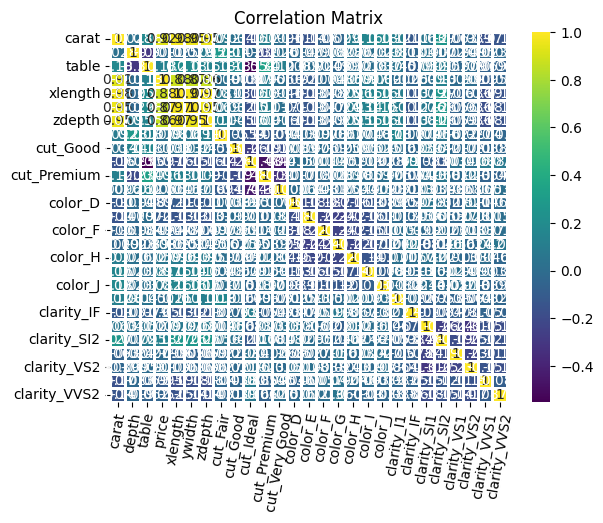

In [7]:

print("Correlation Matrix:\n", data.corr())

plt.figure(dpi=100)
plt.title("Correlation Matrix")
sns.heatmap(data.corr(), annot=True, lw=1, cmap="viridis", linecolor='white')
plt.xticks(rotation=80)
plt.show()


## 🤖 Run KNN Classification on Expanded Features

We now run the `knn()` function using the following features:

- `table`
- `xlength`
- `ywidth`
- `zdepth`

### Workflow:
- Features are **polynomially expanded** to degree 3 to introduce non-linear interactions.
- Data is scaled using **StandardScaler**.
- Classification is done using **K-Nearest Neighbors (k=3)**.

### Outputs:
- **R² Score**: Measures model accuracy on the current dataset.
- **Matthews Correlation Coefficient (MCC)**: Assesses binary/multiclass classification quality.
- **Confusion Matrix** and **Classification Report**: Evaluate model precision, recall, and F1-score.
- Execution time for the process.

This serves as a baseline for evaluating the effectiveness of KNN without dimensionality reduction.


In [8]:

knn(data, ["table", "xlength", "ywidth", "zdepth"], "cut_Ideal")


coefficient of determinantion (R^2):  0.6004634779384501
matthews_corrcoef:  0.8268744970394903

Confusion matrix: 
[[29618  2771]
 [ 1761 19790]]

Classification report: 
              precision    recall  f1-score   support

       False       0.94      0.91      0.93     32389
        True       0.88      0.92      0.90     21551

    accuracy                           0.92     53940
   macro avg       0.91      0.92      0.91     53940
weighted avg       0.92      0.92      0.92     53940


Time of execution:  4.146178483963013 seconds


## 📉 Run KNN Classification with PCA

In this step, we apply **Principal Component Analysis (PCA)** to reduce the dimensionality of the polynomial feature set before classification.

### Workflow:
- Apply **polynomial expansion** (degree = 3)
- Reduce dimensionality to **3 principal components** using PCA
- Standardize the data
- Apply **KNN** with 3 neighbors for classification

### Outputs:
- **R² Score** and **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix** and **Classification Report**
- **2D Scatter Plot** visualizing:
  - Ground truth (circle markers)
  - Model predictions (cross markers)

PCA helps reduce complexity and noise, making the classification task more efficient and interpretable.


coefficient of determinantion (R^2):  0.6091768631813126
matthews_corrcoef:  0.7751589788787763

Confusion matrix: 
[[29017  3372]
 [ 2498 19053]]

Classification report: 
              precision    recall  f1-score   support

       False       0.92      0.90      0.91     32389
        True       0.85      0.88      0.87     21551

    accuracy                           0.89     53940
   macro avg       0.89      0.89      0.89     53940
weighted avg       0.89      0.89      0.89     53940




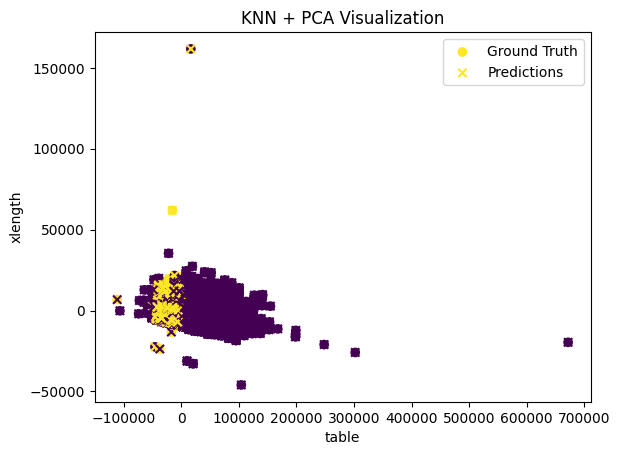

Time of execution:  3.6707494258880615 seconds


In [9]:

knn_pca(data, ["table", "xlength", "ywidth", "zdepth"], "cut_Ideal")


## 🧬 Run KNN Classification with t-SNE

In this final step, we use **t-SNE (T-distributed Stochastic Neighbor Embedding)** to perform non-linear dimensionality reduction and visualize the classification space.

### Workflow:
- Apply **polynomial expansion** (degree = 3)
- Apply **t-SNE** to reduce features to **2D** space
- Scale the features and train a **KNN classifier** (k=3)

### Outputs:
- **R² Score** and **Matthews Correlation Coefficient (MCC)**
- **Confusion Matrix** and **Classification Report**
- **2D t-SNE Scatter Plot** with colored classes (ground truth)

⚠️ t-SNE is primarily a visualization tool. It preserves **local structure**, making it useful for spotting clusters or decision boundaries visually.


coefficient of determination (R^2):  0.6437337782721543
matthews_corrcoef:  0.8197590067812179

Confusion matrix: 
[[29619  2770]
 [ 1936 19615]]

Classification report: 
              precision    recall  f1-score   support

       False       0.94      0.91      0.93     32389
        True       0.88      0.91      0.89     21551

    accuracy                           0.91     53940
   macro avg       0.91      0.91      0.91     53940
weighted avg       0.91      0.91      0.91     53940




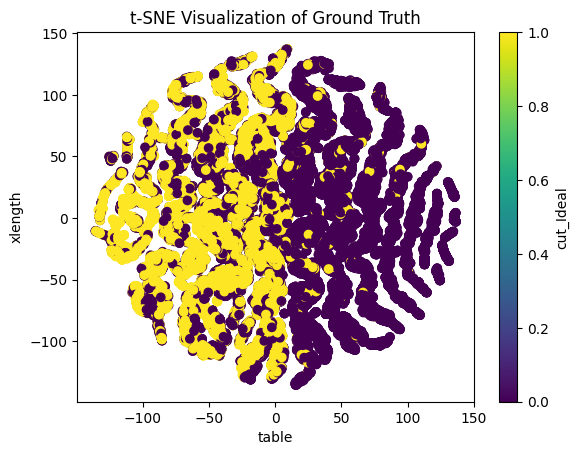

In [10]:

knn_tsne(data, ["table", "xlength", "ywidth", "zdepth"], "cut_Ideal")
